# Representation of a Grazing Incidence pattern

### In a grazing-incidence scattering experiments (GIWAXS, GISAXS) on a thin film, a fiber symmetry is usually considered

Inside a fiber, there is a vertical axis with specific crystalline planes while the radial axis are equivalent

The same way, for a thin film, it is common to split the q vector in a vertical component (along the thickness axis) and an in-plane component

In [1]:
from pyFAI.calibrant import get_calibrant
from pyFAI.detectors import RayonixLx255, Pilatus1M
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
from pyFAI.gui import jupyter
from pyFAI.test.utilstest import UtilsTest
import fabio
from PIL import Image
from pyFAI import load
import time
t0 = time.perf_counter()

### In pyFAI: 

x is the horizontal axis of the lab

y is the vertical axis of the lab

z is the beam propagation axis

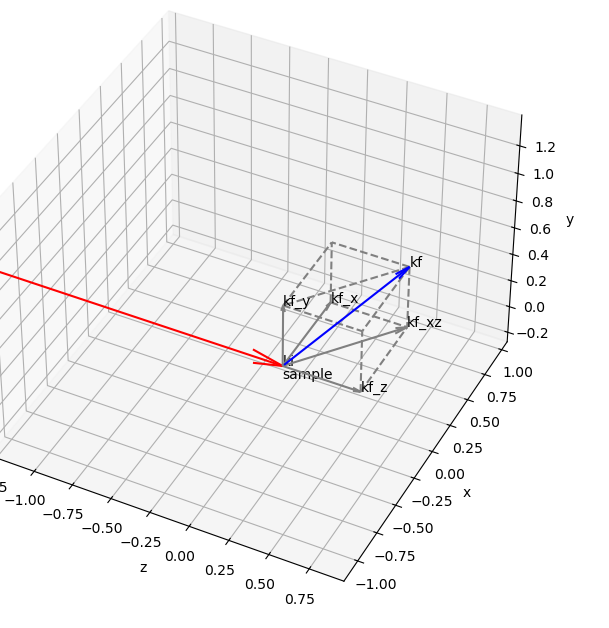

In [2]:
Image.open(UtilsTest.getimage("giwaxs.png"))

#### We simulate data with the calibrant LaB6

In [3]:
cal = get_calibrant("LaB6")
det = Pilatus1M()
ai = AzimuthalIntegrator(detector=det, poni1=0.05, poni2=0.01, dist=0.1, wavelength=1e-10)
fake_data = cal.fake_calibration_image(ai=ai)

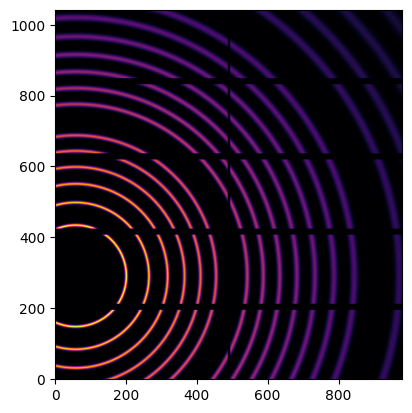

In [4]:
jupyter.display(fake_data)
pass

#### To represent the image as a function of in-plane and out-of-plane components of the q vector

In [5]:
unit_qx = "qxgi_nm^-1"
unit_qy = "qygi_nm^-1"
unit_qz = "qzgi_nm^-1"

In [6]:
qx = ai.array_from_unit(unit=unit_qx)
qy = ai.array_from_unit(unit=unit_qy)
qz = ai.array_from_unit(unit=unit_qz)

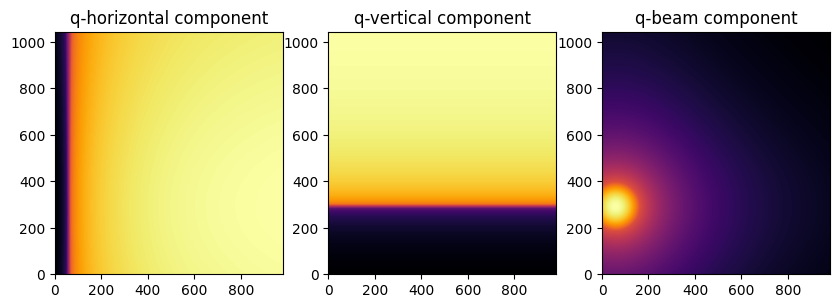

In [7]:
fig, axes = jupyter.subplots(ncols=3, figsize=(10,5))
jupyter.display(img=qx, ax=axes[0], label="q-horizontal component")
jupyter.display(img=qy, ax=axes[1], label="q-vertical component")
jupyter.display(img=qz, ax=axes[2], label="q-beam component")
pass

In [8]:
unit_qip = "qip_nm^-1"
unit_qoop = "qoop_nm^-1"
qip = ai.array_from_unit(unit=unit_qip)
qoop = ai.array_from_unit(unit=unit_qoop)

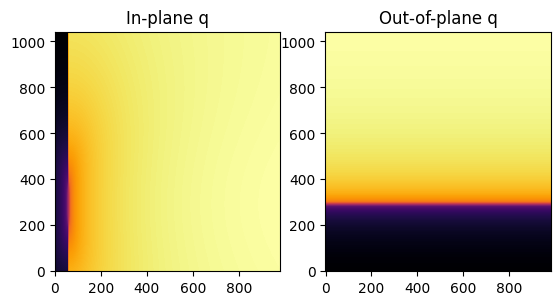

In [9]:
fig, axes = jupyter.subplots(ncols=2)
jupyter.display(img=qip, ax=axes[0], label="In-plane q")
jupyter.display(img=qoop, ax=axes[1], label="Out-of-plane q")
pass

### Then, GIWAXS and GISAXS patterns are represented as a function of qip and qoop

So, the horizontal component multiplied by the beam component yields the characteristic "missing wedge" of the pattern

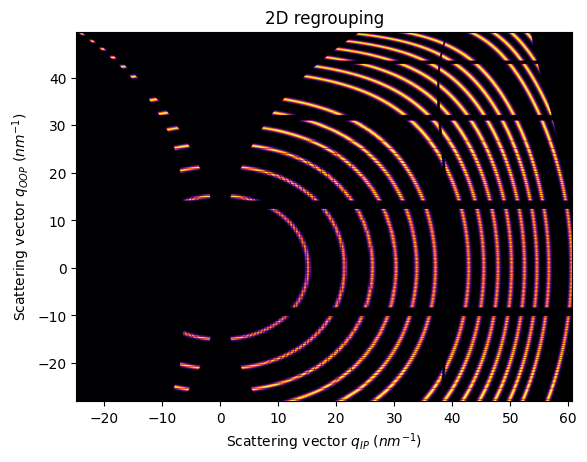

In [10]:
res2d = ai.integrate2d(fake_data, 1000,1000, unit=(unit_qip, unit_qoop), method=("no", "csr", "cython"))
jupyter.plot2d(res2d)
pass

#### Note that is important to use a non-splitting pixel method, otherwise, the gap is filled

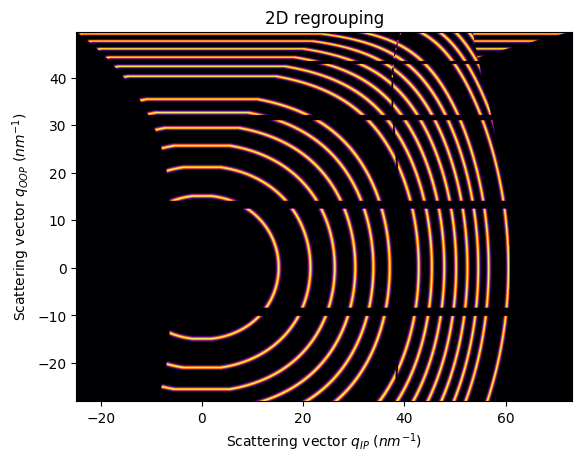

In [11]:
res2d = ai.integrate2d(fake_data, 1000,1000, unit=(unit_qip, unit_qoop), method=("bbox", "csr", "cython"))
jupyter.plot2d(res2d)
pass

#### Since orientation is important in this context, it's possible that the detector or the sample is 90 degrees rotated

The differences are better spotted with an elongated detector

In [12]:
det = RayonixLx255()
ai = AzimuthalIntegrator(detector=det, poni1=0.05, poni2=0.01, dist=0.1, wavelength=1e-10)
fake_data = cal.fake_calibration_image(ai=ai)

In [13]:
unit_qip = "qip_nm^-1"
unit_qoop = "qoop_nm^-1"
qip = ai.array_from_unit(unit=unit_qip)
qoop = ai.array_from_unit(unit=unit_qoop)

#### In this case, the incident angle goes with the short side of the detector

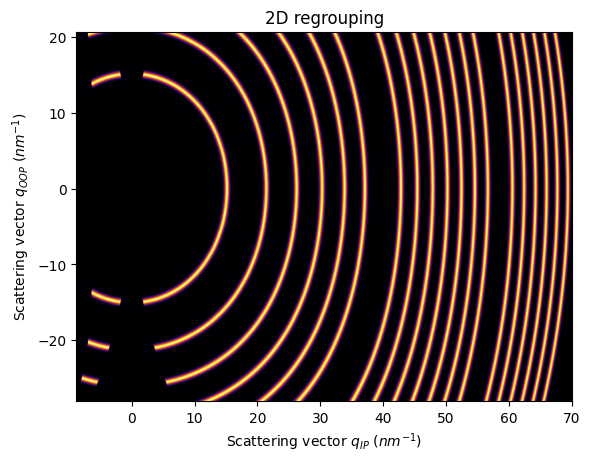

In [14]:
res2d = ai.integrate2d(fake_data, 1000,1000, unit=(unit_qip, unit_qoop), method=("no", "csr", "cython"))
jupyter.plot2d(res2d)
pass

#### If we use rotated units, the incident angle will go with the long side of the detector

In [15]:
unit_qip = "qiprot90_nm^-1"
unit_qoop = "qooprot90_nm^-1"
qip = ai.array_from_unit(unit=unit_qip)
qoop = ai.array_from_unit(unit=unit_qoop)

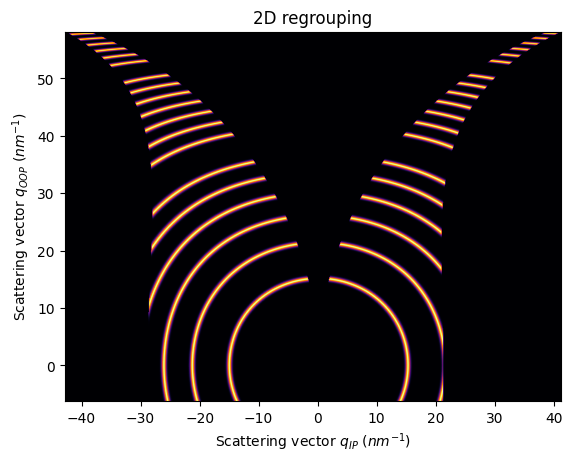

In [16]:
res2d = ai.integrate2d(fake_data, 1000,1000, unit=(unit_qip, unit_qoop), method=("no", "csr", "cython"))
jupyter.plot2d(res2d)
pass

#### Example with real GIWAXS data

In [17]:
data = fabio.open(UtilsTest.getimage("pm6.edf")).data
ai = load(UtilsTest.getimage("lab6_pm6.poni"))

In [18]:
unit_qip = "qiprot90_nm^-1"
unit_qoop = "qooprot90_nm^-1"
qip = ai.array_from_unit(unit=unit_qip)
qoop = ai.array_from_unit(unit=unit_qoop)

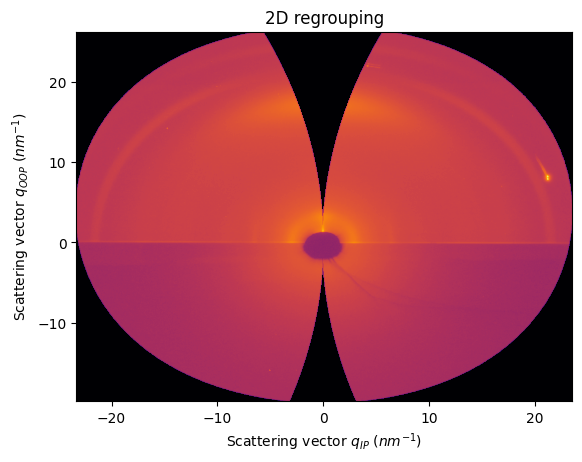

In [19]:
res2d = ai.integrate2d(data, 1000,1000, unit=(unit_qip, unit_qoop), method=("no", "csr", "cython"))
jupyter.plot2d(res2d)
pass

### For the moment, pyFAI does not allow to change manually the incident and tilt angles (by default 0.0)

But if we change the values in the code to 0.2, we will see both effects of horizontal tilting and two intersection points with the orientation sphere

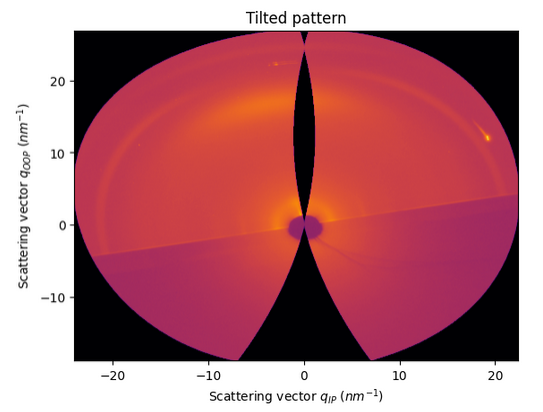

In [20]:
Image.open(UtilsTest.getimage("giwaxs_tilted.png"))

In [21]:
print(f"Total run-time: {time.perf_counter()-t0:.3f}s")

Total run-time: 18.039s


# Conclusions

Now, PyFAI provides the units to represent a data array as a function of in-plane and out-of-plane components of vector q. This is a standard way of represent GIWAXS/GISAXS patterns. For the moment, incident_angle and tilt_angle are set to 0.0. While usually, the tilt_angle is corrected at the beginning of the experiment (so 0.0 is desired), the incident_angle is a key parameter during a GI experiment. However, for shallow angles (<1 degrees), a representation of the pattern using 0.0 is usually accurate enough.